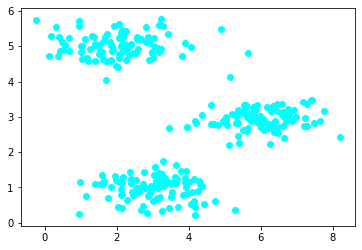

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score


data = pd.read_csv("k-means.csv", header = None, sep = '\t' )


for idx, row in data.iterrows():
    row[0] = float(row[0].replace(',', '.'))
    row[1] = float(row[1].replace(',', '.'))

data_val = data.iloc[:, :].values

datax1 = data.iloc[:, 0].values
datax2 = data.iloc[:, 1].values

plt.scatter(datax1, datax2, c="cyan")

Iteration: 1


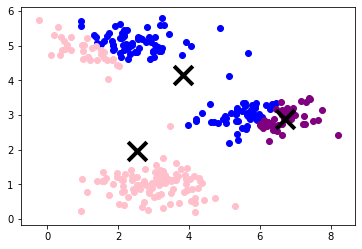

Iteration: 2


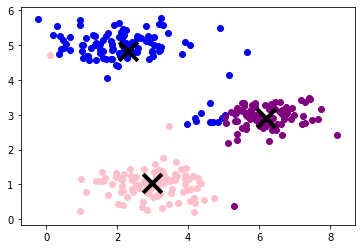

Iteration: 3


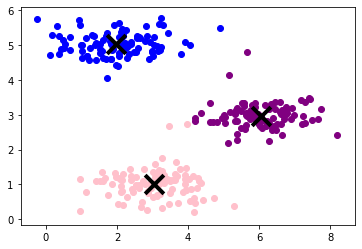

Iteration: 4


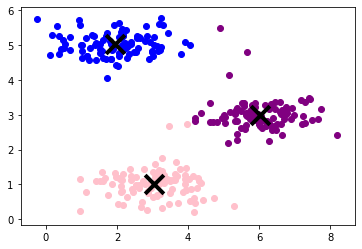

Iteration: 5


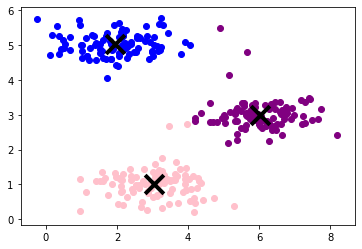

Iteration: 6


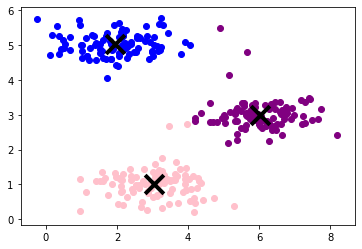

Iteration: 7


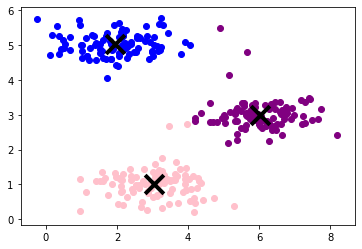

Iteration: 8


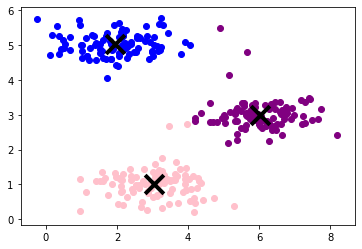

Iteration: 9


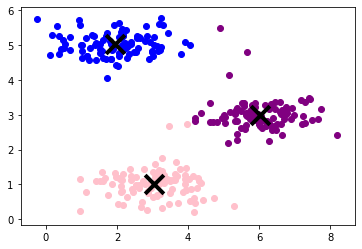

Iteration: 10


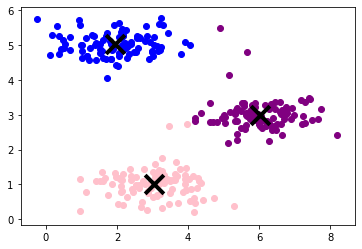

In [9]:
m = data_val.shape[0]
n = data_val.shape[1]
iteration = 10
K = 3
testing = [[0.3, 5.2], 
           [2, 4.4], 
           [1.1, 5.2], 
           [5.2, 2.9], 
           [5.3, 3.3], 
           [6.1, 2.8]]

centroids = {}
for i in range(K):
    centroids[i] = data_val[np.random.randint(0,m+1),:]
        

for i in range(iteration):
    colors =["purple", "pink", "blue"]
    print("Iteration: " + str(i+1))
    clstr = dict()
    for i in range(K):
        clstr[i] = []
    for values in data_val:
        e_distance = []
        for j in range(K):
            e_distance.append(np.linalg.norm(values - centroids[j]))
        clstr[e_distance.index(min(e_distance))].append(values)
    clstr

    for i in range(K):
        centroids[i] = np.average(clstr[i], axis=0)
    centroids
    for i in range(K):
        for cluster in clstr[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i - 1])
        plt.scatter(centroids[i][0], centroids[i][1], marker='x', c='black', s=350, linewidth=4)
    plt.show()

In [10]:
#cost function using library
for k in range (1, K+1):
 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(data_val[:, :])
    labels = kmeans_model.labels_
 
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)

k: 1  cost: 1957.654720625168
k: 2  cost: 913.3192714747092
k: 3  cost: 266.65851965491936


In [11]:
#Use silhouette score
range_n_clusters = list (range(2,12))

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(data_val)
    preds = clusterer.predict(data_val)
    centers = clusterer.cluster_centers_

    score = silhouette_score (data_val, preds, metric='euclidean')
    print (n_clusters-1, score)
    

1 0.547631974589349
2 0.690099372877954
3 0.6057663995248568
4 0.5229511931100482
5 0.4505605774102179
6 0.4422888110516863
7 0.42686502733316045
8 0.4141982565300048
9 0.4081034499754037
10 0.3964954888011194


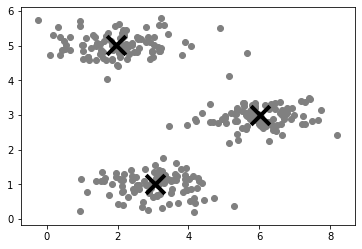

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]

here's the testing part: 
[1 1 1 0 0 0]


In [13]:
def library_kmean(K, X):

    k_means = KMeans(n_clusters=K)
    k_means.fit(X)
    centers = k_means.cluster_centers_

    for i in range(m):
        plt.scatter(X[i, 0], X[i, 1], c="gray")
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='black', s=350, linewidth=4)
    plt.show()

    predicted_clusters = k_means.labels_
    print(predicted_clusters)


    # tests
    print()
    print("here's the testing part: ")
    print(k_means.predict(testing))


library_kmean(K, data_val)